In [1]:
import importlib
import matplotlib.pyplot as plt
import numpy as np
import polars as pl

import sys
sys.path.append('..')


from astroLuSt.project_planning import gantt as alpg


#style for plotting
plt.style.use('astroLuSt.styles.LuSt_style')

# GANTT

Class to generate a GANTT chart and Workload chart for a given project.
In the workload chart each task will be represented by 2 generalized sigmoids:

\begin{align}
    WL
        = \frac{1}{e^{-ss(x-s)}} + \frac{1}{e^{es(x-(s+d))}},
\end{align}

where $ss$ is the start-slope, $es$ the end-slope, $s$ the starting point in time and $d$ the duration.


In [2]:

df = pl.DataFrame({
    '#':[0, 1, 2],
    'task':['Task1', 'Task2', 'Task3'],
    'start':['2023-02-18', '2023-06-20', '2023-07-01'],
    'end':  ['2023-02-26', '2023-07-28', '2023-07-07'],
    'completion':[0.9, 0.04, 0.6],
    'responsible':['User1', 'User2', 'User1'],
    'start_slope':[1.0, 0.5, 2.0],
    'end_slope':[0.9, 1.5, 2.0],
    'weight':[0.2, 1, .7],
    },
)


df = df.with_columns(pl.col('start').str.strptime(pl.Datetime))
df = df.with_columns(pl.col('end').str.strptime(pl.Datetime))
df = df.with_columns((pl.col('end')-pl.col('start')).alias('duration'))
df

#,task,start,end,completion,responsible,start_slope,end_slope,weight,duration
i64,str,datetime[μs],datetime[μs],f64,str,f64,f64,f64,duration[μs]
0,"""Task1""",2023-02-18 00:00:00,2023-02-26 00:00:00,0.9,"""User1""",1.0,0.9,0.2,8d
1,"""Task2""",2023-06-20 00:00:00,2023-07-28 00:00:00,0.04,"""User2""",0.5,1.5,1.0,38d
2,"""Task3""",2023-07-01 00:00:00,2023-07-07 00:00:00,0.6,"""User1""",2.0,2.0,0.7,6d


GANTT(
    start_col=2, end_col='end', dur_col='duration', comp_col='completion',
    start_slope_col='start_slope', end_slope_col='end_slope',
    weight_col='weight',
    color_by='responsible', sort_by=1,
    cmap='autumn', total_color=[0, 0, 0, 1],
    res=100,
    time_scaling=1e-12,
    verbose=0,
    plot_kwargs={}, fill_between_kwargs={'alpha': 0.5}, axvline_kwargs={'color': 'k', 'linestyle': '--'}, text_kwargs={'ha': 'left', 'va': 'bottom', 'y': 0}, grid_kwargs={'visible': True, 'axis': 'x'},
)


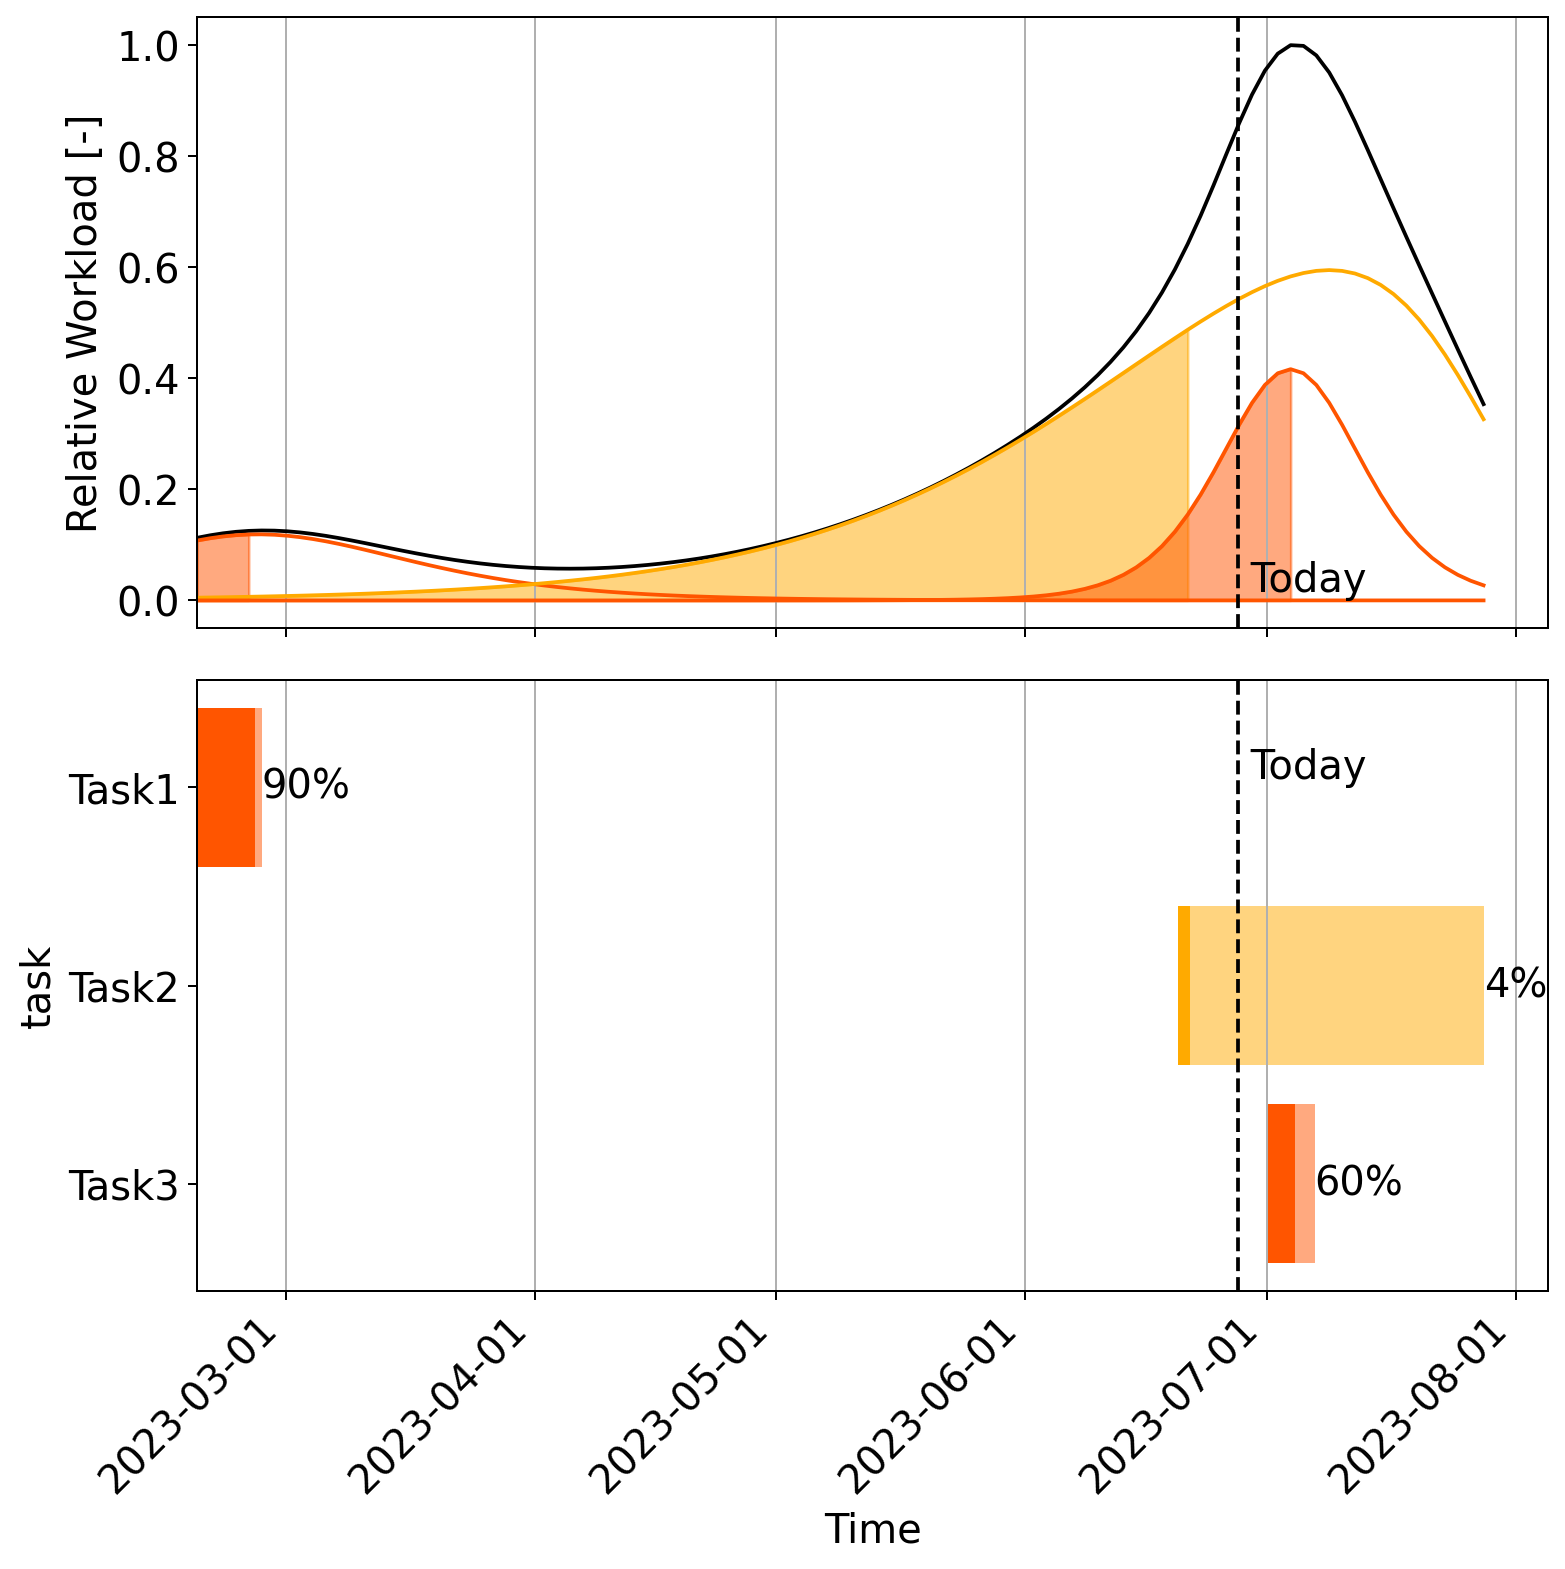

In [8]:
importlib.reload(alpg)

plt.rcParams['figure.figsize'] = (9,9)
gantt = alpg.GANTT(
    start_col=2, end_col='end', dur_col='duration', comp_col='completion',
    start_slope_col='start_slope', end_slope_col='end_slope',
    weight_col='weight',
    color_by='responsible', sort_by=1,
    cmap='autumn', total_color=[0, 0, 0, 1],
    res=100,
    time_scaling=1e-12,
    verbose=0,
    plot_kwargs={}, fill_between_kwargs={'alpha': 0.5}, axvline_kwargs={'color': 'k', 'linestyle': '--'}, text_kwargs={'ha': 'left', 'va': 'bottom', 'y': 0}, grid_kwargs={'visible': True, 'axis': 'x'},
)

print(gantt)

fig, axs = gantt.plot(X=df)
plt.show()